In [ ]:
# Section 1: Import Libraries
import os
import librosa
import pandas as pd
from glob import glob
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np
from scipy.signal import periodogram

In [98]:
def split_audio(input_path, output_dir):
    """
    Split an audio file into 6 equal parts after skipping the first 2.5 seconds.
    
    Parameters:
    input_path (str): Path to the input audio file
    output_dir (str): Directory to save the split audio files
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Load the audio file
    audio, sr = librosa.load(input_path, sr=None)
    
    # Calculate the start point after 2.5 seconds
    start_sample = int(2.5 * sr)
    
    # Trim the first 2.5 seconds
    trimmed_audio = audio[start_sample:]
    
    # Calculate the length of each part
    part_length = len(trimmed_audio) // 6
    
    # Get the base filename without extension
    base_filename = os.path.splitext(os.path.basename(input_path))[0]
    
    # Split and save the audio parts
    for i in range(6):
        start = i * part_length
        end = (i + 1) * part_length if i < 5 else len(trimmed_audio)
        
        part = trimmed_audio[start:end]
        
        # Create output filename with input filename prefix
        output_filename = os.path.join(output_dir, f'{base_filename}_{i+1}.mp3')
        
        # Save the audio part
        sf.write(output_filename, part, sr)
        print(f'Saved {output_filename}')

In [99]:
from sklearn.model_selection import train_test_split

input_dir = 'C:\\Users\\Akanksha Wattamwar\\Desktop\\Collab_Codes\\new_audios'
for filename in os.listdir(input_dir):
    input_path = os.path.join(input_dir, filename)
    split_audio(input_path, r"C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios")
    
# Define the path to the audio folder (assuming it's in the current directory)
audio_path = os.path.join(os.getcwd(), 'C:\\Users\\Akanksha Wattamwar\\Desktop\\Collab_Codes\\splitted_audios')  # Update this to your folder containing .mp3 files

# List all .mp3 files in the directory
audio_files = glob(os.path.join(audio_path, '*.mp3'))

# Display the first few files to confirm loading
print(f"Audio Files: {audio_files[:5]}")

labels = {file: os.path.basename(file).split('-')[0] for file in audio_files}

# Split into train and test sets
train_files, test_files = train_test_split(list(labels.keys()), test_size=0.3, random_state=42)

# Display the first few files to confirm loading
print(f"Train Files: {train_files[:5]}")
print(f"Test Files: {test_files[:5]}")

# Display a sample of extracted labels
print(f"Sample Labels: {[(file, labels[file]) for file in train_files[:5]]}")

Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\0-back-1_1.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\0-back-1_2.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\0-back-1_3.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\0-back-1_4.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\0-back-1_5.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\0-back-1_6.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\0-back-10_1.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\0-back-10_2.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\0-back-10_3.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\0-back-10_4.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\0-back-10_5.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_

In [100]:
train_labels = [os.path.basename(f).split('-')[0].split('.')[0] for f in train_files]

# Extract labels for testing data
test_labels = [os.path.basename(f).split('-')[0].split('.')[0] for f in test_files]

# Create DataFrames for easy handling
adsTrain = pd.DataFrame({'File': train_files, 'Label': train_labels})
adsTest = pd.DataFrame({'File': test_files, 'Label': test_labels})

# Display the first few rows
print(adsTrain.head())
print(adsTest.head())

                                                File Label
0  C:\Users\Akanksha Wattamwar\Desktop\Collab_Cod...     7
1  C:\Users\Akanksha Wattamwar\Desktop\Collab_Cod...     5
2  C:\Users\Akanksha Wattamwar\Desktop\Collab_Cod...     5
3  C:\Users\Akanksha Wattamwar\Desktop\Collab_Cod...     2
4  C:\Users\Akanksha Wattamwar\Desktop\Collab_Cod...     0
                                                File Label
0  C:\Users\Akanksha Wattamwar\Desktop\Collab_Cod...     7
1  C:\Users\Akanksha Wattamwar\Desktop\Collab_Cod...     0
2  C:\Users\Akanksha Wattamwar\Desktop\Collab_Cod...     5
3  C:\Users\Akanksha Wattamwar\Desktop\Collab_Cod...     3
4  C:\Users\Akanksha Wattamwar\Desktop\Collab_Cod...     8


next trial we use all sound features

In [101]:
import os
import numpy as np
import pandas as pd
import librosa
from scipy.signal import periodogram
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [148]:
def extract_audio_features(files, fs=44100, n_fft=2048, hop_length=512):
    """
    Extracts multiple audio features from a list of audio files.

    Parameters:
    - files: List of paths to the audio files.
    - labels: List of activity labels corresponding to each audio file.
    - fs: Sampling frequency (default 44100).
    - n_fft: FFT size (default 2048).
    - hop_length: Hop length for frame splitting (default 512).

    Returns:
    - pd.DataFrame: A DataFrame containing audio features and activity labels.
    """
    features_data = []

    for i, audio_file in enumerate(files):
        # Load the audio file
        y, sr = librosa.load(audio_file, sr=fs)

        # Extract various audio features
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # MFCCs (13 coefficients)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)  # Chroma features
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)  # Spectral contrast
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)  # Zero Crossing Rate
        rmse = librosa.feature.rms(y=y)  # Root Mean Square Error (Energy)
        spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)  # Spectral Roll-off

        # Flatten the features to a 1D array
        feature_vector = np.hstack((
            np.mean(mfccs, axis=1),  # Mean MFCC coefficients
            np.mean(chroma, axis=1),  # Mean Chroma
            np.mean(spectral_contrast, axis=1),  # Mean Spectral Contrast
            np.mean(zero_crossing_rate, axis=1),  # Mean Zero Crossing Rate
            np.mean(rmse, axis=1),  # Mean RMSE
            np.mean(spectral_rolloff, axis=1)  # Mean Spectral Roll-off
        ))

        # Append the feature vector to the features_data list
        features_data.append(feature_vector)

    # Convert the features data to a numpy array
    features_data = np.array(features_data)

    # Create a DataFrame with the features and ActivityID labels
    df = pd.DataFrame(features_data)
    # df['ActivityID'] = labels  # Add activity labels as a column

    return df


In [ ]:
# Extract the features using the function
train_df = extract_audio_features(train_files)
test_df = extract_audio_features(test_files)

# Extract the feature data (X) and labels (y) for train and test
X_train = train_df  
y_train = train_labels  # Get the labels for training data

X_test = test_df  # Drop the 'ActivityID' and keep the features
y_test = test_labels  # Get the labels for testing data

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler fitted on the training data

# One-hot encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded)  # Convert to one-hot encoding for classification

y_test_encoded = label_encoder.transform(y_test)
y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded)  # Convert to one-hot encoding for classification


C:\Users\Akanksha Wattamwar\AppData\Roaming\Python\Python312\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


## Neural Network Model

In [121]:
# Build the neural network model
NN_model = Sequential()
NN_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
NN_model.add(Dropout(0.3))
NN_model.add(Dense(64, activation='relu'))
NN_model.add(Dropout(0.3))
NN_model.add(Dense(32, activation='relu'))
NN_model.add(Dense(y_train_onehot.shape[1], activation='softmax'))  # Output layer for multi-class classification

# Compile the model
optimizer = Adam(learning_rate=0.0001)
NN_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


C:\Users\Akanksha Wattamwar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [122]:
# Train the model
history = NN_model.fit(X_train_scaled, y_train_onehot, epochs=500, batch_size=32, validation_data=(X_test_scaled, y_test_onehot))


Epoch 1/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0742 - loss: 2.4250 - val_accuracy: 0.0925 - val_loss: 2.2694
Epoch 2/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1286 - loss: 2.2847 - val_accuracy: 0.2738 - val_loss: 2.1498
Epoch 3/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1944 - loss: 2.1881 - val_accuracy: 0.3523 - val_loss: 2.0307
Epoch 4/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2411 - loss: 2.0862 - val_accuracy: 0.3813 - val_loss: 1.9132
Epoch 5/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3000 - loss: 1.9885 - val_accuracy: 0.4103 - val_loss: 1.8072
Epoch 6/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3205 - loss: 1.8817 - val_accuracy: 0.4234 - val_loss: 1.7092
Epoch 7/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3714 - loss: 1.7901 - val_accuracy: 0.4505 - val_loss: 1.6181
Epoch 8/500
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3967 - loss: 1.7158 - val_accuracy: 0.4813 - v

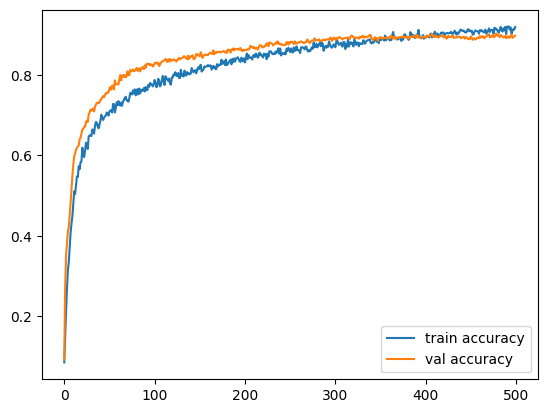

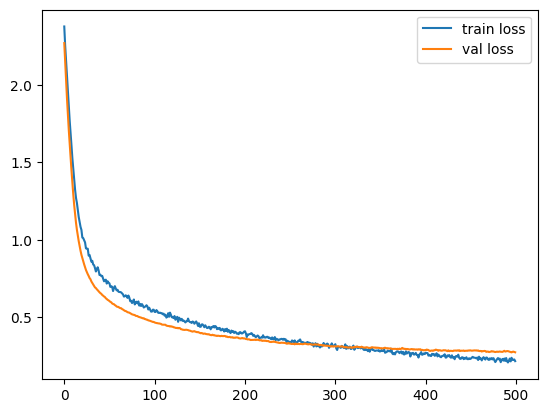

In [123]:
# Plot training history (accuracy and loss)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


In [124]:
# Evaluate the model
loss, NN_accuracy = NN_model.evaluate(X_test_scaled, y_test_onehot)
print(f"Neural Network Accuracy: {NN_accuracy * 100:.2f}%")


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.9075 - loss: 0.2578
Neural Network Accuracy: 89.81%


In [125]:
# Optionally, make predictions on the test data
predictions = NN_model.predict(X_test_scaled)
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Display predictions
for file, pred in zip(test_files, predicted_labels):
    print(f"File: {file}, Predicted Label: {pred}")


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
File: C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\7-back-11_3.mp3, Predicted Label: 7
File: C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\0-front-10_5.mp3, Predicted Label: 0
File: C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\5-back-6_3.mp3, Predicted Label: 5
File: C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\3-rec-13_6.mp3, Predicted Label: 3
File: C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\8-back-11_2.mp3, Predicted Label: 8
File: C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\2-back-2_3.mp3, Predicted Label: 2
File: C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\0-front-15_2.mp3, Predicted Label: 0
File: C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\0-bot-9_6.mp3, Predicted Label: 2
File: C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_audios\3-rec-6_4.mp3, Predicted Label: 3
Fi

## ML Models

In [150]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_scaled, y_train_encoded)

# Predict on the test data
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test_encoded, rf_predictions)
print(f"Random Forest Classifier Accuracy: {rf_accuracy * 100:.2f}%")


Random Forest Classifier Accuracy: 85.89%


In [128]:
from sklearn.svm import SVC
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train_encoded)

# Predict on the test data
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test_encoded, svm_predictions)
print(f"Support Vector Machine Accuracy: {svm_accuracy * 100:.2f}%")


Support Vector Machine Accuracy: 81.59%


In [153]:
from sklearn.neighbors import KNeighborsClassifier
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train_scaled, y_train_encoded)

# Predict on the test data
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test_encoded, knn_predictions)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")


K-Nearest Neighbors Accuracy: 86.17%


In [130]:
# Print out the comparison of all models
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Support Vector Machine Accuracy: {svm_accuracy * 100:.2f}%")
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")
print(f"Neural Network Accuracy: {NN_accuracy * 100:.2f}%")


Random Forest Accuracy: 85.89%
Support Vector Machine Accuracy: 81.59%
K-Nearest Neighbors Accuracy: 86.17%
Neural Network Accuracy: 89.81%


In [ ]:
# Function to process and test a random audio file
def test_audio_file(test_filepath, model):
    split_audio(test_filepath,r"C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_test_audios")
    input_dir = r"C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_test_audios"
    files = []
    for filename in os.listdir(input_dir):
        input_path = os.path.join(input_dir, filename)
        files.append(input_path)

    df= extract_audio_features(files)
    X_scaled = scaler.transform(df)
        
    predictions = model.predict(X_scaled)
    if(model == NN_model):
        predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))
    print(predictions)

In [155]:
test_audio_file(r"C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\new_audios\8-back-5.mp3", knn_model)

Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_test_audios\8-back-5_1.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_test_audios\8-back-5_2.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_test_audios\8-back-5_3.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_test_audios\8-back-5_4.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_test_audios\8-back-5_5.mp3
Saved C:\Users\Akanksha Wattamwar\Desktop\Collab_Codes\splitted_test_audios\8-back-5_6.mp3
[8 8 8 8 8 8 9 9 9 9 9 9]
